# Core 2 Artificial Neural Network

In this project, I will create a neural network that can classify Pokémon based on their atributes.

## EDA

I will start with cleaning and visualizing the data.

### 1. Data Understanding

I will start with Understanding the dataset

In [33]:
import pandas as pd
import seaborn as sns 
import numpy as np

#Reading the data
df_pokemon = pd.read_csv("pokemon.csv")

#Show the first 5 rows of the data
df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [9]:
#Check what data we have, their count and their data type
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [12]:
#Check the shape of the dataset
df_pokemon.shape

(801, 41)

In [22]:
#Check unique values
df_pokemon.nunique()

abilities            482
against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          34
classfication        588
defense              109
experience_growth      6
height_m              51
hp                    99
japanese_name        801
name                 801
percentage_male        7
pokedex_number       801
sp_attack            111
sp_defense            97
speed                113
type1                 18
type2                 18
weight_kg            421
generation             7


### 2. Data Cleaning

Now I want to check if there are any empty columns

In [23]:
df_pokemon.isnull().values.any()

True

In [25]:
#Put the columns with null values in seperate variable and print it
cols_missing_val = df_pokemon.columns[df_pokemon.isnull().any()].tolist()
print(cols_missing_val)

['height_m', 'percentage_male', 'type2', 'weight_kg']


In [26]:
#Count missing values in each column:
for col in cols_missing_val:
    print("%s : %d" % (col, df_pokemon[col].isnull().sum()))

height_m : 20
percentage_male : 98
type2 : 384
weight_kg : 20


<Axes: >

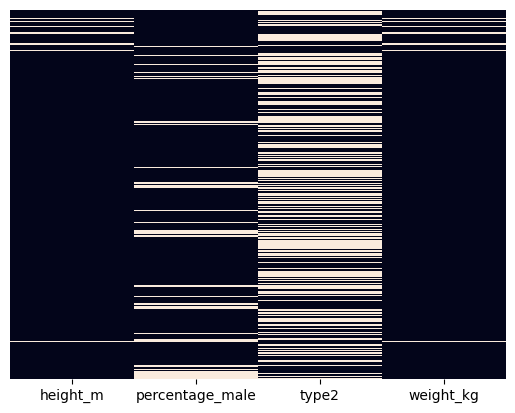

In [31]:
sns.heatmap(df_pokemon[cols_missing_val].isnull(), yticklabels = False, cbar = False)

In [34]:
df_pokemon['percentage_male'].fillna(np.int(-1), inplace= True)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations